In [18]:
import control as ct
import altair as alt
import pandas as pd

In [2]:
def second_order_section(s,b0,b1,b2,a1,a2):
    return ct.tf([s*b2,s*b1,s*b0],[a2,a1,1],1/(39.06e6))

In [3]:
filter_coefficients = [
    [1.0000000000, 0.6413900006, -1.0290561741, 0.6413900006, -1.6378425857, 0.8915664128], 
    [1.0000000000, 0.5106751138, -0.7507394931, 0.5106751138, -1.4000444473, 0.6706551819],
    [1.0000000000, 0.3173108134, -0.3111365531, 0.3173108134, -1.0873085012, 0.4107935750]]


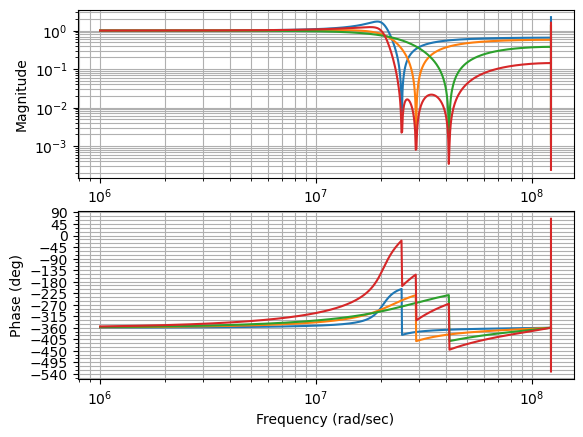

In [13]:
labels = ["first stage","second stage","third stage"]
df_list = []
sys = ct.tf([1],[1],1/(39.06e6))

for label, coeff in zip(labels,filter_coefficients):
    filter = second_order_section(*coeff)
    sys = ct.series(sys,filter)
    mag,phase,omega = ct.bode_plot(filter)
    df_list.append(pd.DataFrame({'label' : label,
                   'freq' : omega,
                   'mag' : mag,
                   'phase' : phase}))
    
mag,phase,omega = ct.bode_plot(sys)
df_list.append(pd.DataFrame({'label' : "total",
                   'freq' : omega,
                   'mag' : mag,
                   'phase' : phase}))


df = pd.concat(df_list)

In [38]:
magnitude = alt.Chart(df).mark_line().encode(
    x=alt.X('freq:Q').scale(type="log",domain = [8e6, 1e8]),
    y=alt.Y('mag:Q').scale(type="log"),
    color='label:N',
).properties(
    width=400,
    height=200
)

phase = alt.Chart(df).mark_line().encode(
    x=alt.X('freq:Q').scale(type="log",domain = [8e6, 1e8]),
    y=alt.Y('phase:Q'),
    color='label:N',
).properties(
    width=400,
    height=100
)

alt.vconcat(magnitude,phase).transform_filter(
    alt.FieldRangePredicate(field='freq', range=[8e6, 1e8]))

alt.VConcatChart(...)

In [26]:
alt.Chart(df).mark_line().encode(
    x=alt.X('freq:Q').scale(type="log"),
    y=alt.Y('mag:Q').scale(type="log"),
    color='label:N',
).properties(
    width=400,
    height=200
)

,label,freq,mag,phase
0,first stage,1.000000e+06,1.000728,-6.272219
1,first stage,1.004720e+06,1.000735,-6.272167
2,first stage,1.009463e+06,1.000742,-6.272115
3,first stage,1.014228e+06,1.000749,-6.272062
4,first stage,1.019015e+06,1.000756,-6.272009
...,...,...,...,...
692,total,1.196956e+08,0.143015,-6.312059
693,total,1.205261e+08,0.143061,-6.304099
694,total,1.213624e+08,0.143092,-6.296091
695,total,1.222045e+08,0.143108,-6.288030
